<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="left"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

In [1]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm

import warnings
warnings.filterwarnings("ignore")

<font size =5 > Aprendizado Supervisionado e Não Supervisionado </font>

A aprendizagem de máquina, uma subárea da inteligência artificial, pode ser dividida em duas categorias principais: aprendizagem supervisionada e aprendizagem não supervisionada.


Na **aprendizagem supervisionada**, o algoritmo é treinado usando um conjunto de dados que inclue tanto as características (variáveis explicativas) quanto as classes (ou saídas desejadas). Após o treinamento, o modelo pode ser usado para prever classes para novos dados não registrados.

Exemplos: detecção de spam de e-mail, reconhecimento de imagem, entre outros.

Na **aprendizagem não supervisionada**, o algoritmo é alimentado com um conjunto de dados que não possui rótulos ou saídas conhecidas. O objetivo principal é encontrar estruturas, padrões ou agrupamentos nos dados sem orientação externa.



# Modelo K-Nearest Neighbor (KNN)

O algoritmo dos k-vizinhos mais próximos (k-NN) é um algoritmo de aprendizado de máquina usado para classificação. O KNN classifica cada valor de um conjunto de dados avaliando sua distância em relação aos k vizinhos mais próximos. Se os k vizinhos mais próximos forem majoritariamente de uma classe, a amostra em questão será classificada nesta categoria. A ideia é a seguinte:



<img src="http://www.orlandoalbarracin.com.br/phyton/knn.png" width=850, align="left">

Quando o k é pequeno, a classificação fica mais sensível a regiões bem próximas (podendo ocorrer o problema de overfitting). Com k grande, a classificação fica menos sujeita a ruídos pode ser considerada mais robusta, porém se k for grande demais, pode ser que haja o problema de underfitting.

Em nosso exemplo, veja o que acontece se consideramos 5 vizinhos próximos.

<img src="http://www.orlandoalbarracin.com.br/phyton/knn2.png" width=850, align="left">

<font size =5 > Algoritmo KNN </font>

1.   Selecione o dado a ser classifica, meça sua distância (euclidiana) em relação a cada um dos outros dados que já estão classificados;
1.   Selecione os primeros k dados com menores distâncias;
1.   Verifique as classes (ou categorias) dos dados que tiveram as k menores distâncias e conte a quantidade de vezes que cada classe que apareceu;
1.   Classifique esse novo dado como pertencente à classe que mais apareceu.

<font size =4 > Funções Distância </font>

Existem várias funções distância, mas em geral aplicaremos aqui a distância Euclidiana.

$$ d(x,y) = \sqrt{ (x_1 - y_1)^2 + (x_2 - y_2)^2 }$$







### Prós
* É simples de implementar; Treinar é mais fácil; Tem poucos parâmetros.

### Limitações
* Alto custo de previsão; Não funciona bem com vários recursos; Requer o uso de uma função distância.



## Exemplo
Utilizaremos um exemplo bastante simples com o objetivo de facilitar a compreensão do modelo. Neste exemplo, a classificação do 'Tipo de Taxa de Empréstimo', que pode ser Padrão ou Não, é determinada com base em apenas dois atributos: a idade do cliente e o valor do empréstimo

In [2]:
Loans = pd.DataFrame({'Age':[40,35,45,34,45,48,53,60,50,48,53],
                      'Loan':[100000,60000,80000,40000,120000,98000,95000,92000,100000,170000,150000],
                      'Type_loan':[1,1,1,1,1,1,0,0,0,0,0] }) # 1=normal 0=especial

Loans

,Age,Loan,Type_loan
0,40,100000,1
1,35,60000,1
2,45,80000,1
3,34,40000,1
4,45,120000,1
5,48,98000,1
6,53,95000,0
7,60,92000,0
8,50,100000,0
9,48,170000,0


Qual deve ser o Tipo de Taxa de Empréstimo: Padrão ou Não, para um cliente com 47 anos e um emprestimo de 142.000? Vamos visualizar os dados:

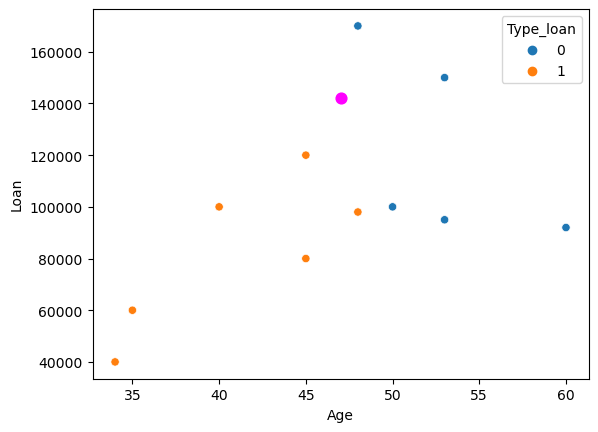

In [3]:
# Visualizando os dados!

sns.scatterplot(data=Loans, x='Age', y='Loan', hue='Type_loan')
plt.scatter(47, 142000, c='fuchsia',s=60) # Novo valor a ser classificado
plt.show()

In [4]:
# Calculando as distâncias

dist = []
for i in range(11):
    d = float( np.sqrt( (Loans.iloc[i].Age - 47)**2 + (Loans.iloc[i].Loan - 142000)**2 ) )
    dist.append(d)

Loans['dist'] = dist

Loans.sort_values('dist')

,Age,Loan,Type_loan,dist
10,53,150000,0,8000.002250
4,45,120000,1,22000.000091
9,48,170000,0,28000.000018
8,50,100000,0,42000.000107
0,40,100000,1,42000.000583
5,48,98000,1,44000.000011
6,53,95000,0,47000.000383
7,60,92000,0,50000.001690
2,45,80000,1,62000.000032
1,35,60000,1,82000.000878


Considerando k=3 (os três vizinhos mais próximos) a Tipo de Taxa de Empréstimo para esse novo cliente seria: especial ( type_loan =0).


<font size =5> **Cuidado!** Normalizar os dados </font>

A distância euclidiana é sensível à escala dos dados, o que significa que variáveis com escalas diferentes podem afetar o resultado. Para evitar esse problema, é comum normalizar ou padronizar os dados antes de calcular a distância euclidiana. Isso garante que todas as variáveis tenham a mesma influência na medida de distância.

Portanto, antes de calcular distâncias euclidianas em conjuntos de dados com variáveis de escalas diferentes, é recomendável normalizar ou padronizar os dados para obter resultados mais robustos e significativos.

In [5]:
# Normalizando o novo dado

print("idade:", 47/Loans.Age.max())
print("Loan:", 142000/Loans.Loan.max())

idade: 0.7833333333333333
Loan: 0.8352941176470589


In [6]:
# Normalizando os dados

Loans["Age"] = Loans.Age / Loans.Age.max()
Loans["Loan"] = Loans.Loan / Loans.Loan.max()

In [7]:
# Calculando as distâncias

dist = []
for i in range(11):
    d = float( np.sqrt( (Loans.iloc[i].Age - 0.7833)**2 + (Loans.iloc[i].Loan - 0.83529)**2 ) )
    dist.append(d)

Loans['dist'] = dist

Loans.sort_values('dist')

,Age,Loan,Type_loan,dist
10,0.883333,0.882353,0,0.110551
4,0.750000,0.705882,1,0.133623
9,0.800000,1.000000,0,0.165554
8,0.833333,0.588235,0,0.252070
5,0.800000,0.576471,1,0.259358
0,0.666667,0.588235,1,0.273202
6,0.883333,0.558824,0,0.294007
7,1.000000,0.541176,0,0.365324
2,0.750000,0.470588,1,0.366219
1,0.583333,0.352941,1,0.522156


Considerando k=3 (os três vizinhos mais próximos) a Tipo de Taxa de Empréstimo para esse novo cliente seria: especial ( type_loan =0). Cuidado! **o resultado de classificação poderia ser diferente.**


## Usando o módulo `neighbors` da biblioteca `sklearn`

In [8]:
from sklearn import neighbors

In [9]:
Loans = pd.DataFrame({'Age':[40,35,45,34,45,48,53,60,50,48,53],
                      'Loan':[100000,60000,80000,40000,120000,98000,95000,92000,100000,170000,150000],
                      'Type_loan':[1,1,1,1,1,1,0,0,0,0,0] }) # 1=normal 0=especial
Loans.head(3)

,Age,Loan,Type_loan
0,40,100000,1
1,35,60000,1
2,45,80000,1


In [10]:
new_case=pd.DataFrame({'Age':[47],
                      'Loan':[142000]}) # 1=normal 0=especial
new_case

,Age,Loan
0,47,142000


In [11]:
# Dados de entrada/saída
X = Loans[['Age','Loan']]
y = Loans[["Type_loan"]]

# padroniza os dados para que a média seja 0 e o desvio padrão seja 1.
X_padronizados = (X-X.mean())/X.std()

# Definindo ou declarando o modelo
k=3
clf = neighbors.KNeighborsClassifier(k)

# Aprendizado (Emprega o conjunto de treinamento)
clf.fit(X_padronizados, y)

# Fazendo a predição
new_case_padronizado=(new_case-X.mean())/X.std()
Loan_type_pred = clf.predict(new_case_padronizado)

print('Classificação Knn, k=', k ,' para o novo empréstimo ', 'é ')
print(Loan_type_pred)

Classificação Knn, k= 3  para o novo empréstimo  é 
[0]


<font size= 5> Adicionando variáveis categóricas </font>

In [12]:
Loans = pd.DataFrame({'Age':[40,35,45,34,45,48,53,60,50,48,53],
                      'Loan':[100000,60000,80000,40000,120000,98000,95000,92000,100000,170000,150000],
                      'Duration':['Short','Long','Short','Undefined','Long','Short','Long','Short','Undefined','Long', 'Short'],
                      'Type_loan':[1,1,1,1,1,1,0,0,0,0,0] }) # 1=normal 0=especial
Loans.head()

,Age,Loan,Duration,Type_loan
0,40,100000,Short,1
1,35,60000,Long,1
2,45,80000,Short,1
3,34,40000,Undefined,1
4,45,120000,Long,1


In [13]:
new_case  = pd.DataFrame({'Age':[47],
                      'Duration':['Short'],
                      'Loan':[142000]})
new_case

,Age,Duration,Loan
0,47,Short,142000


In [14]:
# Variáveis dummy (Hot encode)

dummies = pd.get_dummies(Loans["Duration"])
Loans = pd.concat([Loans, dummies],axis=1)
Loans.head()

,Age,Loan,Duration,Type_loan,Long,Short,Undefined
0,40,100000,Short,1,0,1,0
1,35,60000,Long,1,1,0,0
2,45,80000,Short,1,0,1,0
3,34,40000,Undefined,1,0,0,1
4,45,120000,Long,1,1,0,0


In [15]:
# Eliminando a coluna original
Loans.drop(columns=['Duration'], inplace=True)
Loans

,Age,Loan,Type_loan,Long,Short,Undefined
0,40,100000,1,0,1,0
1,35,60000,1,1,0,0
2,45,80000,1,0,1,0
3,34,40000,1,0,0,1
4,45,120000,1,1,0,0
5,48,98000,1,0,1,0
6,53,95000,0,1,0,0
7,60,92000,0,0,1,0
8,50,100000,0,0,0,1
9,48,170000,0,1,0,0


In [16]:
# New case

dummies_new_case = pd.get_dummies(new_case["Duration"])
new_case = pd.concat([new_case, dummies_new_case],axis=1)
new_case.drop(columns=['Duration'], inplace=True)
new_case.head()

,Age,Loan,Short
0,47,142000,1


In [17]:
# Adicionando as colunas que faltam
new_case['Long'] = 0
new_case['Undefined'] = 0
new_case

,Age,Loan,Short,Long,Undefined
0,47,142000,1,0,0


In [18]:
# Dados de entrada/saída
X = Loans[['Age','Loan']]
y = Loans[["Type_loan"]]

# Normalizando os dados
X_padronizados = (X-X.mean())/X.std()
X_padronizados = pd.concat([X_padronizados, dummies],axis=1) #adicionando dummies

# Definindo ou declarando o modelo
k=3
clf = neighbors.KNeighborsClassifier(k)

# Aprendizado (Emprega o conjunto de treinamento)
clf.fit(X_padronizados, y)

# Fazendo a predição
X_new_case=new_case[['Age','Loan']]
X_new_case_padr=(X_new_case-X.mean())/X.std()

X_new_case_padr=pd.concat([X_new_case_padr, new_case[["Long","Short","Undefined"]]],axis=1)

Loan_type_pred = clf.predict(X_new_case_padr)

print('Classificação Knn, k=', k ,' para o novo empréstimo ', 'é ')
print(Loan_type_pred)

Classificação Knn, k= 3  para o novo empréstimo  é 
[1]
